In [1]:
from arctic import Arctic
from arctic.date import DateRange
from arctic.exceptions import NoDataFoundException
from arctic.date import DateRange
import pandas as pd
from ib_insync import IB, ContFuture, util, Future, Forex, Contract
from typing import Union
import pickle
from datetime import datetime, timedelta
import sys
sys.path.append('/home/tomek/ib_tools')
from datastore import ArcticStore

/home/tomek/.virtualenvs/ib/lib/python3.7/site-packages/arctic/store/_pandas_ndarray_store.py:6: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import DataFrame, Series, Panel


In [ ]:
util.startLoop()
ib = IB()
ib.connect(port=4002, clientId=9)

In [ ]:
ib.isConnected()

In [ ]:
Arctic('localhost').list_libraries()

In [2]:
store = ArcticStore('TRADES_30_secs')

Library created, but couldn't enable sharding: no such command: 'enablesharding'. This is OK if you're not 'admin'


In [4]:
keys = store.keys()
keys

['6EM0_CONTFUT',
 '6EU0_CONTFUT',
 '6JM0_CONTFUT',
 '6JU0_CONTFUT',
 'BZZ0_CONTFUT',
 'CLN0_CONTFUT',
 'CLU0_CONTFUT',
 'ESM0_CONTFUT',
 'ESU0_CONTFUT',
 'FCEM0_CONTFUT',
 'FDAX_JUN_20_CONTFUT',
 'FDAX_SEP_20_CONTFUT',
 'GCQ0_CONTFUT',
 'GEM0_CONTFUT',
 'GEU0_CONTFUT',
 'M2KM0_CONTFUT',
 'M2KU0_CONTFUT',
 'M6EM0_CONTFUT',
 'M6EU0_CONTFUT',
 'MESM0_CONTFUT',
 'MESU0_CONTFUT',
 'MFCN0_CONTFUT',
 'MGCQ0_CONTFUT',
 'MJYM0_CONTFUT',
 'MJYU0_CONTFUT',
 'MNQM0_CONTFUT',
 'MNQU0_CONTFUT',
 'MYM_SEP_20_CONTFUT',
 'NKDM0_CONTFUT',
 'NKDU0_CONTFUT',
 'NQM0_CONTFUT',
 'NQU0_CONTFUT',
 'RTYM0_CONTFUT',
 'RTYU0_CONTFUT',
 'YM_JUN_20_CONTFUT',
 'YM_SEP_20_CONTFUT',
 'ZB_JUN_20_CONTFUT',
 'ZB_SEP_20_CONTFUT',
 'ZF_JUN_20_CONTFUT',
 'ZF_SEP_20_CONTFUT',
 'ZN_JUN_20_CONTFUT',
 'ZN_SEP_20_CONTFUT',
 'ZS_JUL_20_CONTFUT']

In [74]:
df = store.read('NQM0_CONTFUT', start_date='20180601', end_date='20200101')
df.loc['20180601 16:15:00':].head(10)

,open,high,low,close,volume,average,barCount
date,,,,,,,
2018-06-01 16:15:00,7034.50,7035.75,7029.25,7030.25,1143,7031.975,544
2018-06-01 16:15:30,7030.00,7030.75,7025.25,7026.50,1145,7028.175,550
2018-06-01 16:16:00,7026.25,7027.75,7024.50,7024.75,1004,7025.725,569
2018-06-01 16:16:30,7024.75,7025.25,7020.25,7021.25,1422,7022.350,667
2018-06-01 16:17:00,7021.50,7024.50,7020.75,7024.00,812,7022.625,444
2018-06-01 16:17:30,7024.00,7024.50,7022.25,7023.75,541,7023.275,260
2018-06-01 16:18:00,7023.50,7027.75,7023.50,7027.50,466,7025.700,269
2018-06-01 16:18:30,7027.25,7030.75,7025.75,7029.25,1000,7028.975,343
2018-06-01 16:19:00,7029.50,7034.50,7029.00,7034.00,1267,7032.650,563


In [78]:
df[df.index.duplicated()]

,open,high,low,close,volume,average,barCount
date,,,,,,,


In [64]:
resampled = df.resample('T').agg({'open': 'first', 'high': 'max', 'low': 'min', 'close': 'last', 'volume': 'sum', 'barCount': 'sum'}).dropna()
resampled

,open,high,low,close,volume,barCount
date,,,,,,
2018-06-01 00:00:00,6982.50,6982.50,6977.25,6978.75,88,67
2018-06-01 00:01:00,6979.75,6980.50,6978.00,6979.50,96,58
2018-06-01 00:02:00,6980.00,6981.25,6979.50,6981.25,20,13
2018-06-01 00:03:00,6981.00,6981.25,6980.25,6980.75,12,9
2018-06-01 00:04:00,6981.00,6981.00,6980.50,6980.50,2,2
...,...,...,...,...,...,...
2019-12-31 22:55:00,8769.75,8770.75,8768.75,8770.00,83,50
2019-12-31 22:56:00,8770.25,8771.25,8770.25,8770.25,41,19
2019-12-31 22:57:00,8770.50,8771.00,8769.75,8769.75,48,25


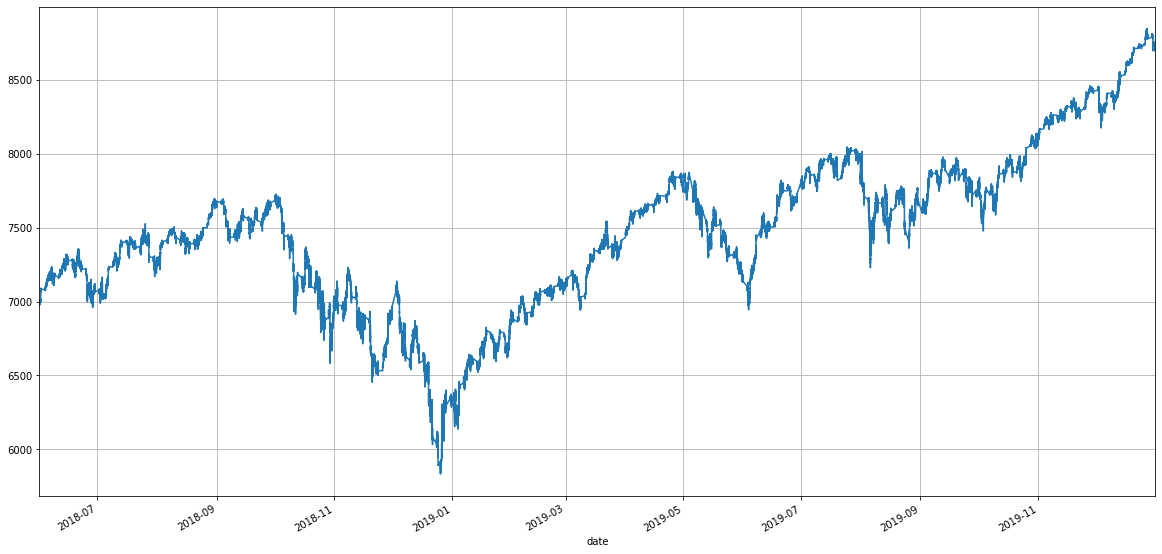

In [65]:
df.close.plot(figsize=(20,10), grid=True);

In [66]:
from datastore import Store
old_store = Store()

In [72]:
df1 = old_store.read('/cont/min/ES_20200320_GLOBEX_USD').sort_index(ascending=True).loc['20180601': '20191231']
df1

,open,high,low,close,volume,average,barCount
date,,,,,,,
2018-06-01 00:00:00,2707.50,2707.75,2706.00,2706.75,1150,2706.800,179
2018-06-01 00:01:00,2706.75,2706.75,2706.25,2706.50,376,2706.475,84
2018-06-01 00:02:00,2706.75,2707.25,2706.50,2707.00,73,2706.900,25
2018-06-01 00:03:00,2707.00,2707.25,2707.00,2707.00,17,2707.025,8
2018-06-01 00:04:00,2707.00,2707.25,2707.00,2707.25,10,2707.075,4
...,...,...,...,...,...,...,...
2019-12-31 22:55:00,3235.75,3236.00,3235.50,3235.75,349,3235.675,46
2019-12-31 22:56:00,3235.75,3236.00,3235.50,3235.75,190,3235.700,31
2019-12-31 22:57:00,3236.00,3236.25,3235.75,3235.75,356,3235.900,42


In [77]:
df1[df1.index.duplicated()]

,open,high,low,close,volume,average,barCount
date,,,,,,,


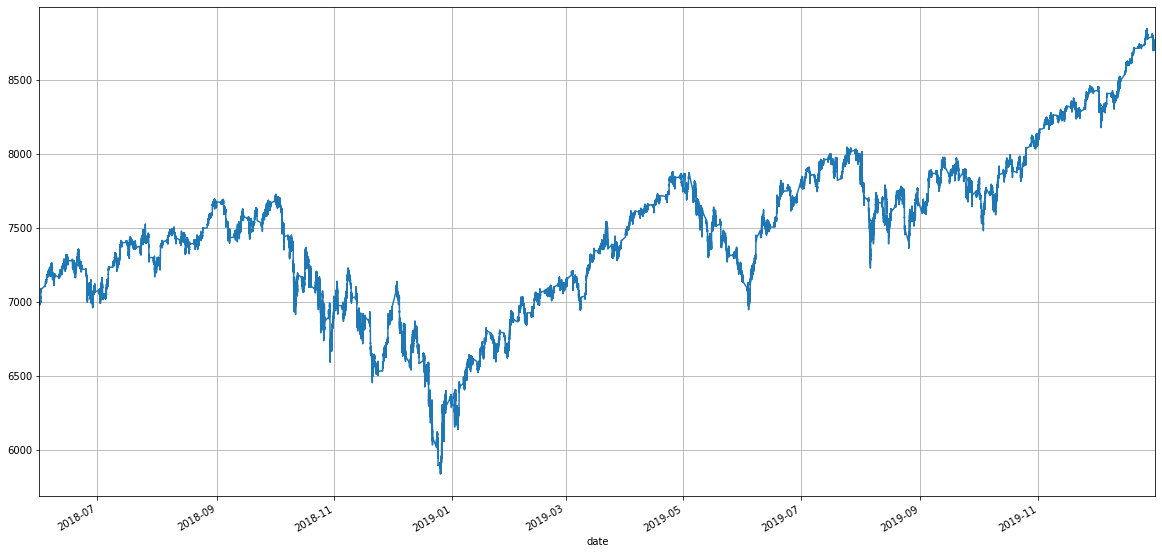

In [69]:
df1.close.plot(figsize=(20,10), grid=True);

In [70]:
comp = pd.DataFrame({'new': resampled.close, 'old': df1.close}).dropna()
comp['diff'] = comp['old'] - comp['new']
comp

,new,old,diff
date,,,
2018-06-01 00:00:00,6978.75,6978.75,0.0
2018-06-01 00:01:00,6979.50,6979.50,0.0
2018-06-01 00:02:00,6981.25,6981.25,0.0
2018-06-01 00:03:00,6980.75,6980.75,0.0
2018-06-01 00:04:00,6980.50,6980.50,0.0
...,...,...,...
2019-12-31 22:55:00,8770.00,8770.00,0.0
2019-12-31 22:56:00,8770.25,8770.25,0.0
2019-12-31 22:57:00,8769.75,8769.75,0.0


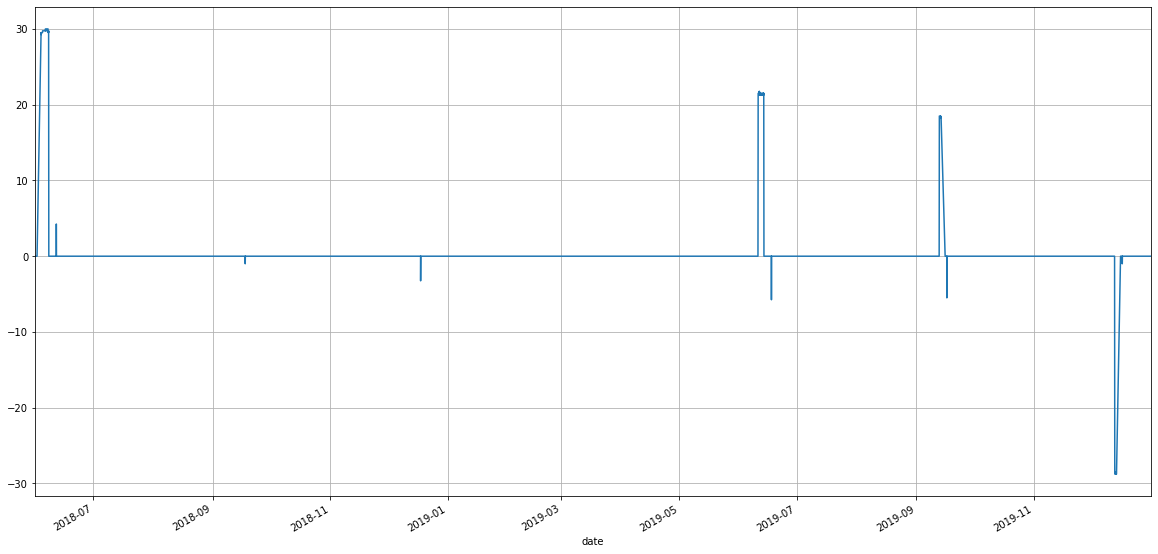

In [71]:
comp['diff'].plot(figsize=(20,10), grid=True);

In [ ]:
store.read(nq, '20180701', end).head(10)

In [ ]:
date_range = DateRange('2018-05-19 00:00:00', '2019-12-31 00:00:00')

In [ ]:
start = '2018-05-19 00:00:00'
end = '2019-12-31 00:00:00'

In [ ]:
nq = ContFuture(conId=371749745, symbol='NQ', lastTradeDateOrContractMonth='20200918', multiplier='20', exchange='GLOBEX', currency='USD', localSymbol='NQU0', tradingClass='NQ')


In [ ]:
nq

In [ ]:
bars = ib.reqHistoricalData(
            nq,
            endDateTime= '20180602 00:00:00',
            durationStr='3 D',
            barSizeSetting='30 secs',
            whatToShow='TRADES',
            useRTH=False,
            formatDate=1)

In [ ]:
df = util.df(bars)
df

In [ ]:
store.read(nq, '20180701', end)

In [ ]:
l = store._contfutures_dict()
l

In [ ]:
x = {}
index = -2
for c, d in l.items():
    keys_list = list(d.keys())
    if len(keys_list) + index < 0:
        index = 0
    x[c] = d[keys_list[index]]
x

In [ ]:
list(d.keys())[0]

In [ ]:
store.latest_contfutures(-2)

In [ ]:
store.contfuture_contract_object('NQ', -2)

In [ ]:
df = store.read('ESM0_CONTFUT', '20180601', '20191231')
df

In [ ]:
(df['close'][-1] - df['open'][0])*20

In [ ]:
store.read_metadata('NQM0_CONTFUT')

In [ ]:
from collections import defaultdict
c = defaultdict(dict)
for k, v in d.items():
    for i in sorted(v):
        c[k].update({i: v[i]})  
c

In [ ]:
d

In [ ]:
c

In [ ]:
store.read(nq)

In [ ]:
%%timeit
store.date_range()

In [ ]:
store.read_object('NQU0_CONTFUT')

In [ ]:
store.read_metadata('NQU0_CONTFUT')

In [ ]:
store.read_object('YM_JUN_20_CONTFUT')

In [ ]:
store.latest_contfutures

In [ ]:
store.contfuture('NQ')

In [ ]:
def hist(days_at_a_time):
    dt = ''
    barsList = []
    i = 10/days_at_a_time
    #i=1
    while i>0:
        bars = ib.reqHistoricalData(
            nq,
            endDateTime=dt,
            durationStr=str(days_at_a_time) + ' D',
            barSizeSetting='1 min',
            whatToShow='TRADES',
            useRTH=False,
            formatDate=1)
        #lib.append('edek', bars)
        if not bars:
            break
            dt -= timedelta(days=1)
            print(f'new dt: {dt}')
            continue
        barsList.append(bars)
        dt = bars[0].date
        print(dt)
        i -= 1
    allBars = [b for bars in reversed(barsList) for b in bars]
    df = util.df(allBars)
    return df

In [ ]:
bars = ib.reqHistoricalData(
            mes,
            endDateTime= '20190506 00:00:00',
            durationStr='1 D',
            barSizeSetting='30 secs',
            whatToShow='TRADES',
            useRTH=False,
            formatDate=1)

In [ ]:
nq

In [ ]:
nq.loc['20190101':]